In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
data = pd.read_excel('/content/drive/My Drive/Leading Transformation Office/AD4058. TASK 8. Data.xlsx')


# Revisión de la BDD para ver si tenemos valores nulos
print("Missing values in our Data Base:")
print(data.isnull().sum())



Missing values in our Data Base:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSour

In [4]:
# Definimos nuestros indicadores y la variable dependiente
predictors = ['EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']
dependent_var = 'PerfScoreID'

X = data[predictors]
y = data[dependent_var]

# Hacemos el modelo de regresión
model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Coefficients for each predictor:")
for predictor, coef in zip(predictors, coefficients):
    print(f"{predictor}: {coef}")

# Calculamos la Chi Cuadrada
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("\nR-squared value:", r2)

Intercept: 2.235290806077933
Coefficients for each predictor:
EngagementSurvey: 0.12243482428067227
EmpSatisfaction: 0.08182927474518825
SpecialProjectsCount: -0.004102756712060594
DaysLateLast30: -0.2766707362419127
Absences: 0.00394446918761452

R-squared value: 0.577567438785897


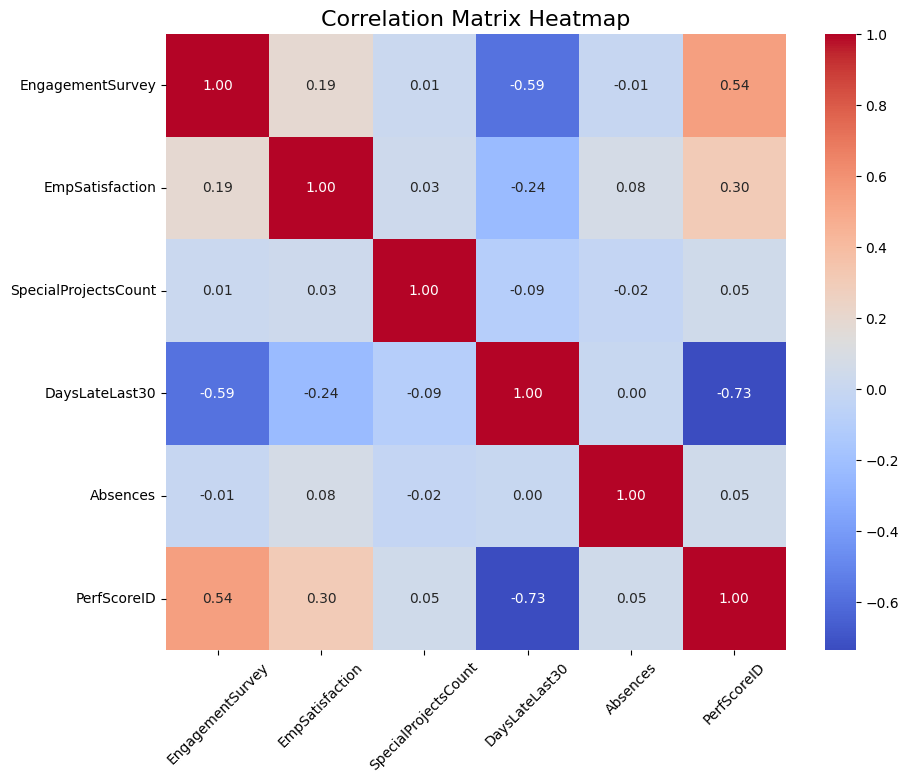

Descriptive Statistics:
                        N   Min   Max       Mean        SD
EngagementSurvey      311  1.12   5.0   4.110000  0.789938
EmpSatisfaction       311  1.00   5.0   3.890675  0.909241
SpecialProjectsCount  311  0.00   8.0   1.218650  2.349421
DaysLateLast30        311  0.00   6.0   0.414791  1.294519
Absences              311  1.00  20.0  10.237942  5.852596
PerfScoreID           311  1.00   4.0   2.977492  0.587072


In [5]:
# Estadísticas descriptivas
descriptive_stats = data[predictors + [dependent_var]].describe().T
descriptive_stats['N'] = data[predictors + [dependent_var]].notnull().sum(axis=0)
descriptive_stats.rename(columns={
    'mean': 'Mean',
    'std': 'SD',
    'min': 'Min',
    'max': 'Max'
}, inplace=True)
descriptive_stats = descriptive_stats[['N', 'Min', 'Max', 'Mean', 'SD']]

correlation_matrix = data[predictors + [dependent_var]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

print("Descriptive Statistics:")
print(descriptive_stats)


In [6]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PerfScoreID   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     83.40
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           5.37e-55
Time:                        19:28:58   Log-Likelihood:                -141.15
No. Observations:                 311   AIC:                             294.3
Df Residuals:                     305   BIC:                             316.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.2353 